<a href="https://colab.research.google.com/github/Shontom6/ML_Algorithms/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN 

reference : https://medium.com/@chenycy/a-simple-convolutional-neural-network-cnn-classifier-based-on-real-images-084110d52c18

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import os
import matplotlib.pyplot as plt


Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.6187 - loss: 0.6401 - val_accuracy: 0.8100 - val_loss: 0.4515
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 110ms/step - accuracy: 0.8229 - loss: 0.4030 - val_accuracy: 0.8363 - val_loss: 0.3800
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 110ms/step - accuracy: 0.8883 - loss: 0.2869 - val_accuracy: 0.8788 - val_loss: 0.2941
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.9136 - loss: 0.2342 - val_accuracy: 0.8863 - val_loss: 0.2698
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.9117 - loss: 0.2044 - val_accuracy: 0.8788 - val_loss: 0.2784
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - accuracy: 0.9388 - loss: 0.1579 - val_accuracy: 0.9062 - val_loss: 0.2202
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.9401 - loss: 0.1445 - val_accuracy: 0.8963 - val_loss: 0.2446


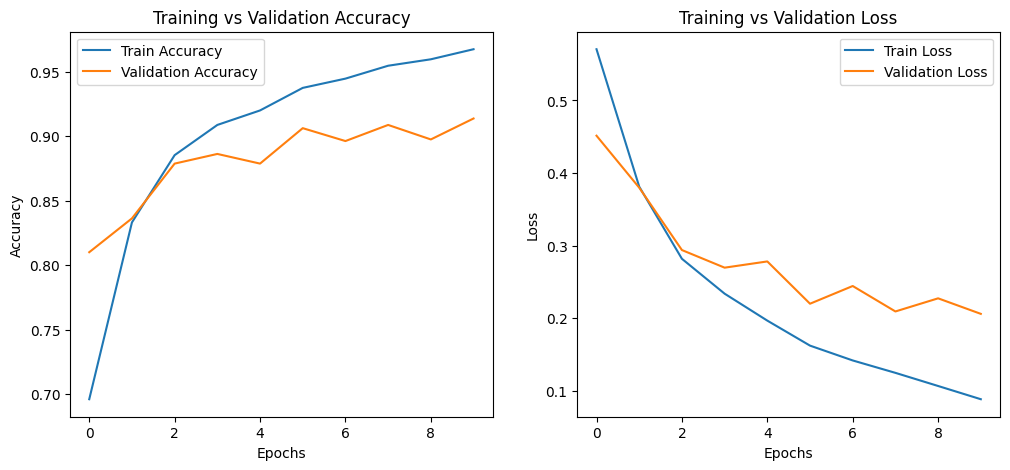

In [11]:

# Define dataset path
dataset_path = "Car-Bike-Dataset"  

# Image Data Generator
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation'
)

# Build CNN model
model = keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification (Car or Bike)
])

# Compile model
model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])#RMSprop(learning_rate=1e-4,adam

# Train model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot Accuracy & Loss Graphs
plt.figure(figsize=(12, 5))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Show the plots
plt.show()

# Save the model for future use
model.save("car_bike_classifier.h5")

